## Assignment 3: $k$ Nearest Neighbor

`! git clone https://github.com/ds3001f25/knn_assignment.git`

**Do two questions in total: "Q1+Q2" or "Q1+Q3"**


**Q1.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1.1

Regression predicts a numeric outcome, while classification predicts a categorical outcome.

1.2

Used in classification, the confusion table cross-tabulates predicted and actual values. It helps us to conceptualize error by showing us what might actually be true or false to understand a model's performance. For example, to diagnose a medical condition, it might show us which predicted negatives are actually negative and which predicted positives are actually positive and which issues might have been falsely diagnosed.

1.3

Used in regression after finding the residuals (way to visualize success or failures), the SSE aggregates the squared errors into a single metric of fit. Thus, it quantifies squared errors about a particular model.

1.4

Overfitting is when your model is too complicated to reliably explain the phenomenon you're interested in. Underfitting is when your model is too simple to reliably explain the phenomenon you're interested in.

1.5

Splitting the data into training and testing sets improves the model performance by substituting uncertainty about future predictions for uncertainty about the hold-out data in order to test the model. This allows you to use your training data to test the efficiency and accuracy of the model. Choosing *k* by evaluating accuracy improves the model performance by either maximizing or minimizing the size of *k* to either have high accuracy in the data or higher generalization. Choosing SSE on the test set improves the model performance because it measures how far predicted values are from true values. This helps to decide how to fit the model better. After testing the model with training data, you can test it with testing data to see how well the model performs.

1.6

The strength of using a prediction for a single class label is that the decision-making is very direct because it only uses a limited amount of information. This could also make it pretty precise and more sensitive to limited signals. A weakness of using a prediction is that because there is very little information, variance cannot be accounted for well. Additionally, it could make flawed decisions without a lot of info. A probability distribution is where you look at the probability of a bunch of outcomes. The strength of using a probability distribution is that it can account for a lot of variance and information. This makes it able to process lots of complex info. A weakness is that it is less sensitive to a lot of signals. This could make it less precise and overconfident.

**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

2.1

I am not seeing any NA values.

In [3]:
cars_df = pd.read_csv("USA_cars_datasets.csv")
cars_df

keep_cars_df = cars_df.loc[:, ["price", "year", "mileage"]] #keep price, year, and mileage
keep_cars_df

print("\nMissing values count per column:")
print(keep_cars_df.isna().sum()) #No NA values

display(keep_cars_df.head()) #first few rows of data
display(keep_cars_df.shape) #(2499, 3)


Missing values count per column:
price      0
year       0
mileage    0
dtype: int64


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


(2499, 3)

2.2

In [4]:
# Maxmin normalization function; Sci-kit calls it the "standard scaler"
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

keep_cars_df["year"] = maxmin(keep_cars_df["year"])
keep_cars_df["mileage"] = maxmin(keep_cars_df["mileage"])

display(keep_cars_df.head())

,price,year,mileage
0,6300,0.744681,0.269287
1,2899,0.808511,0.187194
2,5350,0.957447,0.038892
3,25000,0.872340,0.063016
4,27700,0.957447,0.006537


2.3

In [6]:
# Split the sample:
from sklearn.model_selection import train_test_split
X = keep_cars_df.loc[:, ["year", "mileage"]]
y = keep_cars_df.loc[:, "price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,year,mileage
109,0.957447,0.048624
2296,0.957447,0.053728
354,0.765957,0.177186
266,0.978723,0.015502
2102,0.957447,0.068256
...,...,...
1638,1.000000,0.023561
1095,0.978723,0.006159
1130,0.978723,0.029745
1294,0.978723,0.017232


In [7]:
X_test

,year,mileage
2319,0.893617,0.037284
1865,0.978723,0.028412
902,0.851064,0.160383
2240,0.978723,0.030490
1285,0.978723,0.013229
...,...,...
2054,0.893617,0.065909
1860,0.936170,0.041546
1862,0.978723,0.024431
1151,0.978723,0.017206


In [8]:
y_train

,price
109,23100
2296,8000
354,0
266,17100
2102,16300
...,...
1638,20000
1095,21000
1130,23300
1294,23200


In [9]:
y_test

,price
2319,11390
1865,27900
902,2500
2240,10900
1285,23600
...,...
2054,17150
1860,29000
1862,51000
1151,25300


2.4

k = 3, Mean Squared Error = 148065935.52


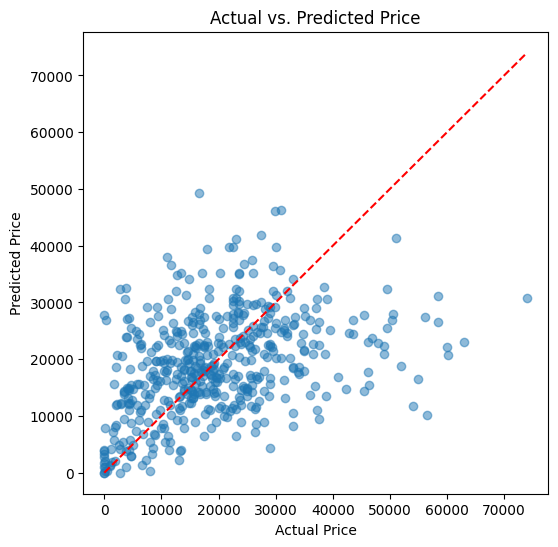

k = 10, Mean Squared Error = 117399126.11


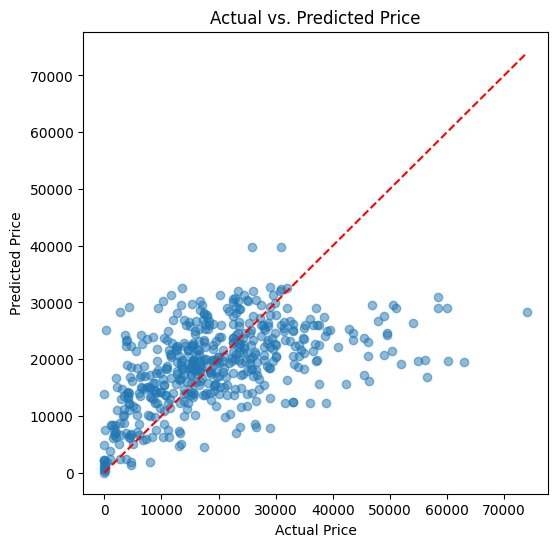

k = 25, Mean Squared Error = 112576160.82


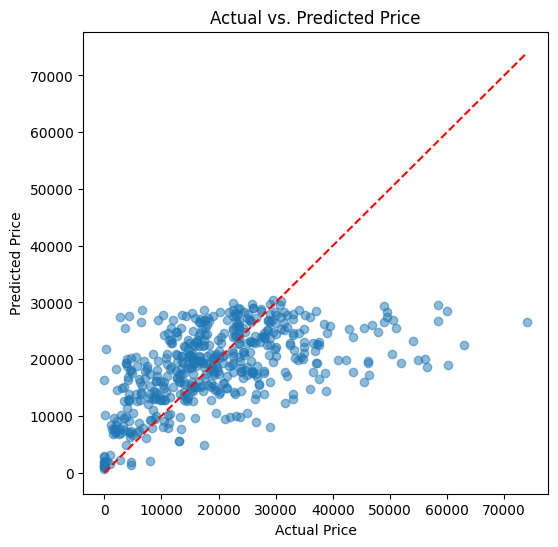

k = 50, Mean Squared Error = 110202549.30


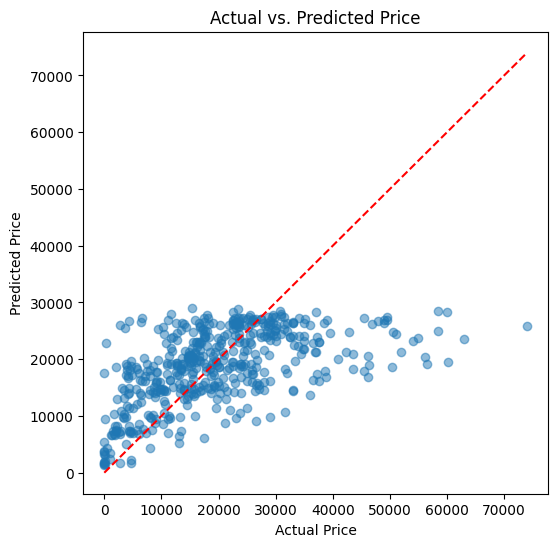

k = 100, Mean Squared Error = 112253932.82


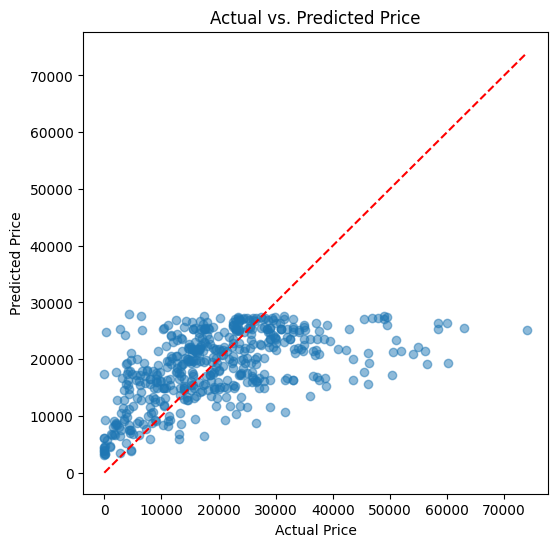

k = 300, Mean Squared Error = 114496301.83


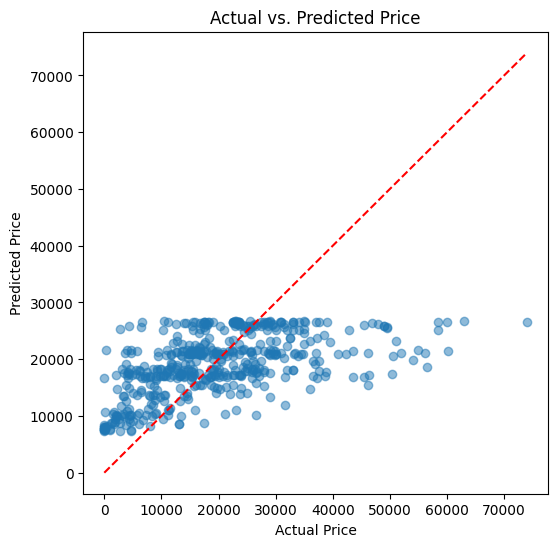

In [13]:
k_values = [3, 10, 25, 50, 100, 300]

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors = k)  #Build the kNN model
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)     #Predict on test set

    mse = np.mean((y_test - y_pred) ** 2)     #Compute MSE
    print(f"k = {k}, Mean Squared Error = {mse:.2f}")

    plt.figure(figsize=(6,6))     #Scatter plot: actual vs predicted
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45° line
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"Actual vs. Predicted Price")
    plt.show()

  #As k increases, the data points seem to plateau, especially in the k = 300 graph

2.5

The optimal k is 50 because while it has less variance, it still has enough data points to be precise.

2.6

For lower values of k, it is more sensitive to the training data, which can lead to more precision. However, because there's less data and less variance, it might be too precise. This can lead to overfitting, where the model is too complicated to reliably explain the phenomenon.

For larger values of k, it is less sensitive to each data point, but it accounts for more variance, which can be useful for making complicated decisions. However, because it is less sensitive, it can lead to underfitting, where the model is too simple to reliably explain the data and the information.

**Q3.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.

Chose not to do this one.